In [1]:
%matplotlib inline

In [2]:
!pip3 install seaborn
!pip3 install imblearn
!pip3 install statsmodels
!pip3 install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 38.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 4.8 MB/s eta 0:00:0000:0100:01


In [3]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from scipy.stats import randint as sp_randint
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Q1. Import and understand the data

## A. Import ‘signal-data.csv’ as DataFrame

In [84]:
df_signal = pd.read_csv('signal-data.csv')

In [85]:
df_signal.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [86]:
df_signal.shape

(1567, 592)

## B. Print 5 point summary and share at least 2 observations

In [87]:
# df_signal.describe() Gives the statistical summary.

df_signal.describe().loc[['min','25%','50%','75%','max']] # Prints the 5 point summary

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
min,2743.24,2158.7500,2060.6600,0.0000,0.6815,100.0,82.1311,0.0000,1.1910,-0.0534,...,0.00000,0.477800,0.0060,0.0017,1.197500,-0.016900,0.0032,0.0010,0.0000,-1.0
25%,2966.26,2452.2475,2181.0444,1081.8758,1.0177,100.0,97.9200,0.1211,1.4112,-0.0108,...,46.18490,0.497900,0.0116,0.0031,2.306500,0.013425,0.0106,0.0033,44.3686,-1.0
50%,3011.49,2499.4050,2201.0667,1285.2144,1.3168,100.0,101.5122,0.1224,1.4616,-0.0013,...,72.28890,0.500200,0.0138,0.0036,2.757650,0.020500,0.0148,0.0046,71.9005,-1.0
75%,3056.65,2538.8225,2218.0555,1591.2235,1.5257,100.0,104.5867,0.1238,1.5169,0.0084,...,116.53915,0.502375,0.0165,0.0041,3.295175,0.027600,0.0203,0.0064,114.7497,-1.0
max,3356.35,2846.4400,2315.2667,3715.0417,1114.5366,100.0,129.2522,0.1286,1.6564,0.0749,...,737.30480,0.509800,0.4766,0.1045,99.303200,0.102800,0.0799,0.0286,737.3048,1.0


### Observations

1. There are certain features which have minimum values as 0, while the maximum value go as high as 3000s and above. All these features are floating point numbers.
2. The target feature "Pass/Fail", has values for min, 25%, 50%, & 75% equals "-1". This indicates that at-least till Q3, target features have value as "-1". Less than or equal to last 25%ile of the values are "1". Hence, possible majority of the target feature has yield status as "Pass".
3. Feature/Column "5" above, has all the values as 100.

# Q2. Data cleansing

## A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature

In [88]:
df_signal.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [89]:
for col in df_signal.iloc[:,1:-1].columns:
    if df_signal[col].isnull().sum()*100/len(df_signal[col]) < 20:
        df_signal[col].fillna(df_signal[col].mean(), inplace=True)
    else:
        df_signal.drop(col, axis=1,inplace=True)

In [90]:
df_signal.isnull().sum().sort_values(ascending=False)

Time         0
398          0
392          0
393          0
394          0
            ..
188          0
187          0
186          0
185          0
Pass/Fail    0
Length: 560, dtype: int64

- Hence, 32 columns have been dropped, because they had more than 20% of the data as null values.
- Remaining columns, the mean values have been imputed with mean.

## B. Identify and drop the features which are having same value for all the rows

In [91]:
# For feature to have same value for all rows. There are several ways to fetch those.
# The easiest way is to check if the feature's min and max value is same, that means all the 
# values in that feature are same.

for col in df_signal.columns:
    if df_signal[col].min()==df_signal[col].max():
        df_signal.drop(col, axis=1, inplace=True)

In [92]:
df_signal.shape

(1567, 444)

- Hence, 116 columns have been removed as they had same values for all the rows

## C. Drop other features if required using relevant functional knowledge. Clearly justify the same

In [93]:
df_signal[df_signal.duplicated()]

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail


- Hence, there are no duplicate rows

In [94]:
for col in df_signal.columns[1:]:
    if round(df_signal[col].std(),2)==0:
        df_signal.drop(col, axis=1, inplace=True)
    else:
        pass

In [95]:
df_signal.shape

(1567, 410)

## D. Check for multi-collinearity in the data and take necessary action

In [96]:
threshold = 0.85
corr_matrix = df_signal.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_correlation = [column for column in upper.columns if any(upper[column] > threshold)]
df_signal.drop(high_correlation, axis=1, inplace = True)

In [97]:
df_signal.shape

(1567, 221)

# Q3. Data analysis & visualisation

## A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

In [98]:
df_signal.head()

,Time,0,1,2,3,4,6,7,8,9,...,565,570,571,572,573,583,586,587,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,0.14561,533.8500,2.1113,8.95,0.3157,0.0118,0.021458,0.016475,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,0.14561,535.0164,2.4335,5.92,0.2653,0.0223,0.009600,0.020100,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,0.62190,535.0245,2.0293,11.21,0.1882,0.0157,0.058400,0.048400,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,0.16300,530.5682,2.0253,9.33,0.1738,0.0103,0.020200,0.014900,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,0.14561,532.0155,2.0275,8.83,0.2224,0.4766,0.020200,0.014900,73.843200,-1


AxesSubplot(0.125,0.125;0.775x0.755)


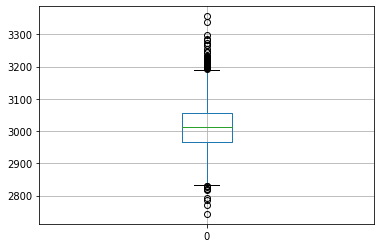

In [99]:
# Univariate Boxplot for column 0
print(df_signal.boxplot(column=['0'], return_type='axes'))

**Observations:**
The above boxplot for column 0 shows the median at around ~3000 value, and there are multiple values that lie outside the Q1 and Q3 range. The maximum value is near ~3350, while the minimum value is less than ~2750.

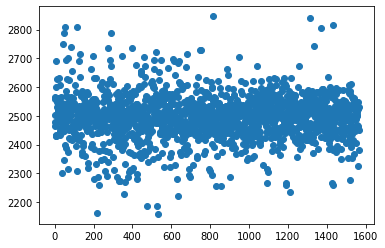

In [100]:
# Univariate Scatterplot for column 1
plt.scatter(df_signal.index,df_signal['1'])
plt.show()

**Observations:**
The above scatterplot for column 1 shows that there is no strong are where most of the datapoints are scattered. The distribution is failrly uniformly distributed from beginning to end.

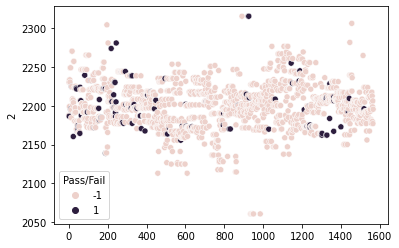

In [101]:
# Univariate Scatterplot for column 2
sns.scatterplot(x=df_signal.index,y=df_signal['2'], hue=df_signal['Pass/Fail'])
plt.show()

**Observations:**
The above scatterplot for column 2 shows that there is no strong are where most of the datapoints are scattered. The distribution is failrly uniformly distributed from beginning to end. However, most of the datapoints for "Fail" are scattered more to the right and left of the plot, whereas "Pass" is present throughout the distribution with more towards centre of the data

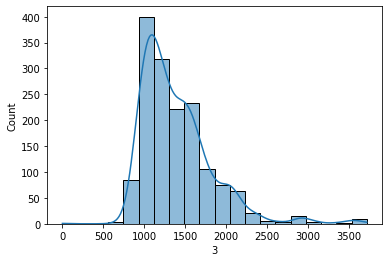

In [102]:
# Univariate Histogram for column 3

sns.histplot(df_signal['3'],bins=20,kde=True)
plt.show()

**Observations:** The above histogram shows that 1000-1500 has the most frequency distributed, with almost negligible datapoints less than 1000. The graph is mostlly uniform distributed with a little rightly skewed.

## B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis

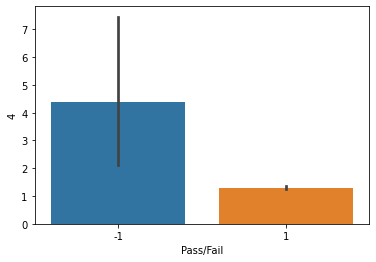

In [103]:
# Barplot for Columns 4 Vs Pass/Fail
sns.barplot(x=df_signal['Pass/Fail'],y=df_signal['4'])
plt.show()

**Observations:** The barplot for Column 4 Vs target feature, shows that there is more number of Pass, in comparison to Fail feature.

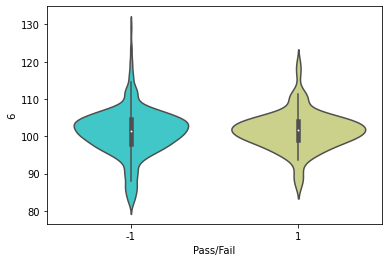

In [104]:
# ViolinPlot for Columns 6 Vs Pass/Fail
sns.violinplot(x=df_signal['Pass/Fail'],y=df_signal['6'],palette='rainbow')
plt.show()

**Observations:** The barplot for Column 6 Vs target feature, shows almost similar distribution. However, the edges of Pass is more scattered, whereas the Fail feature has most of the data within 90 to 110, with less scattering. There is negligible data for Fail feature after 120 value for Column 6

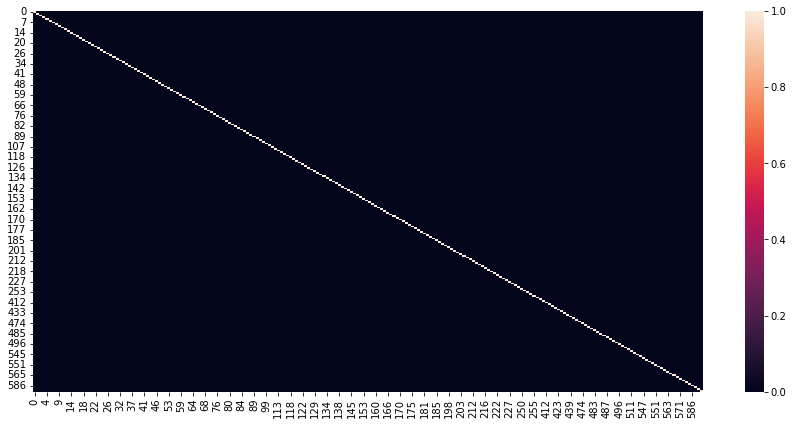

In [105]:
# Heatmap for columns corr > 0.98
corr=df_signal.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr>=0.98)
plt.show()

**Observations:** The heatmap shows columns for which correlation coefficient is 0.98. Hence, the remaining columns are not a part of the heatmap. Regardless, we see that almost whole of the heatmap is close to black color, which shows that there is very minimal absolute correlation, and the most columns are independent of each other.

# Q4

## A. Segregate predictors vs target attributes

In [106]:
X = df_signal.drop(['Time','Pass/Fail'], axis=1) # Predictors
y = df_signal[['Pass/Fail']] # Target Variable

In [107]:
X.head()

,0,1,2,3,4,6,7,8,9,10,...,564,565,570,571,572,573,583,586,587,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,6.444985,0.14561,533.8500,2.1113,8.95,0.3157,0.0118,0.021458,0.016475,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,6.444985,0.14561,535.0164,2.4335,5.92,0.2653,0.0223,0.009600,0.020100,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,1.100000,0.62190,535.0245,2.0293,11.21,0.1882,0.0157,0.058400,0.048400,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,7.320000,0.16300,530.5682,2.0253,9.33,0.1738,0.0103,0.020200,0.014900,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,6.444985,0.14561,532.0155,2.0275,8.83,0.2224,0.4766,0.020200,0.014900,73.843200


In [108]:
y.head()

,Pass/Fail
0,-1
1,-1
2,1
3,-1
4,-1


## B. Check for target balancing and fix it if found imbalanced

In [109]:
print(y.value_counts())

Pass/Fail
-1           1463
 1            104
dtype: int64


In [110]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X,Y=oversample.fit_resample(X,y)
Y.value_counts()

Pass/Fail
-1           1463
 1           1463
dtype: int64

## C. Perform train-test split and standardise the data or vice versa if required

In [111]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,0,1,2,3,4,6,7,8,9,10,...,564,565,570,571,572,573,583,586,587,589
0,0.303750,0.947651,-0.465999,0.079211,-0.036271,-0.675140,0.327026,0.524000,1.344471,-0.420610,...,-0.032018,-0.099245,0.199153,0.029293,-0.207883,-0.049883,-0.281063,-0.022273,-0.067951,-0.004427
1,1.192926,-0.442705,1.105731,0.220341,-0.049195,0.234284,0.402482,0.462152,0.090688,-1.734014,...,-0.032018,-0.099245,0.254124,1.154726,-0.250978,-0.307125,0.520744,-1.083597,0.375512,1.309319
2,-1.044342,0.890552,-0.514680,0.849929,-0.032619,-1.083804,0.311935,-0.378341,0.436042,0.120881,...,-2.463225,6.082150,0.254506,-0.257130,-0.175739,-0.700643,0.016751,3.283982,3.837489,-0.207900
3,-0.275003,-0.235122,-0.049953,-1.267598,-0.037240,0.598323,-0.050251,0.328942,-0.802726,-0.409089,...,0.365990,0.126453,0.044484,-0.271102,-0.202478,-0.774140,-0.395606,-0.134901,-0.260611,-0.317046
4,0.321712,0.087926,1.214142,-0.148080,-0.032054,-0.139983,0.221389,0.565232,-0.104512,-0.858411,...,-0.032018,-0.099245,0.112694,-0.263417,-0.209589,-0.526086,35.212251,-0.134901,-0.260611,-0.317046


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, Y, train_size = .80, random_state=0)

## D. Check if the train and test data have similar statistical characteristics when compared with original data

In [113]:
# 5 point summary of the original data
X.describe().loc[['min','25%','50%','75%','max']]

,0,1,2,3,4,6,7,8,9,10,...,564,565,570,571,572,573,583,586,587,589
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,...,0.970000,0.022400,317.196400,0.980200,3.540000,0.066700,0.0060,-0.016900,0.003200,0.000000
25%,2960.587175,2457.536272,2182.622200,1111.476400,1.075174,98.712200,0.121195,1.427517,-0.009891,-0.004894,...,4.980000,0.095631,530.997453,1.994300,7.710000,0.234314,0.0118,0.014411,0.011300,48.705907
50%,2998.035000,2499.770000,2198.698308,1302.660700,1.309595,101.362425,0.122277,1.466131,-0.001900,0.000804,...,6.390000,0.145610,532.490194,2.144062,8.865433,0.291833,0.0141,0.020800,0.015773,75.744454
75%,3049.178807,2534.478138,2215.790906,1578.102105,1.489000,103.884833,0.123556,1.510726,0.005927,0.005700,...,7.470579,0.178265,534.273205,2.302658,10.095075,0.360600,0.0168,0.027669,0.021000,121.653250
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,32.580000,0.689200,589.508200,2.739500,454.560000,2.196700,0.4766,0.102800,0.079900,737.304800


In [114]:
# summary of the Training data
X_train.describe()

,0,1,2,3,4,6,7,8,9,10,...,564,565,570,571,572,573,583,586,587,589
count,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,...,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,0.000988,0.004691,-0.010001,-0.010020,0.009438,-0.000620,-0.012190,0.018574,-0.012164,-0.012249,...,-0.001099,0.018057,-0.010527,0.007940,0.001426,-0.001827,0.007871,0.003421,0.006602,-0.002435
std,1.011123,0.985903,0.982061,0.981078,1.118255,0.994716,1.109311,0.984026,0.991069,1.009566,...,0.971454,1.022435,1.055517,0.994409,0.998569,0.965238,1.102499,1.000731,1.001266,0.997663
min,-3.640845,-4.751740,-5.144613,-3.711711,-0.052797,-3.651859,-18.416120,-4.384166,-3.880876,-4.049752,...,-2.463225,-1.698283,-10.011539,-3.921600,-0.266339,-1.320778,-0.723965,-3.455335,-1.691888,-1.210874
25%,-0.665911,-0.532087,-0.638936,-0.725855,-0.043099,-0.469625,-0.125707,-0.618275,-0.622542,-0.605475,...,-0.698377,-0.748852,0.064877,-0.379384,-0.225948,-0.472691,-0.281063,-0.650911,-0.688771,-0.617664
50%,-0.144994,0.051289,-0.062663,-0.217475,-0.037328,0.043734,0.036133,0.008097,-0.025259,0.053403,...,-0.057028,-0.099245,0.134380,0.144470,-0.209576,-0.166899,-0.105717,-0.058268,-0.140662,-0.295600
75%,0.544012,0.532126,0.556730,0.512652,-0.032831,0.519003,0.226139,0.695786,0.548657,0.608595,...,0.440256,0.350976,0.220321,0.707853,-0.192522,0.180441,0.106530,0.536345,0.485610,0.278644
max,4.765671,4.919856,4.229555,6.268567,27.068461,5.407983,0.991035,2.956674,5.751482,6.077283,...,5.956190,6.955583,2.822274,2.223574,6.130029,9.550733,35.212251,7.257763,7.690926,7.713766


In [115]:
# 5 point summary of the Training data
X_test.describe()

,0,1,2,3,4,6,7,8,9,10,...,564,565,570,571,572,573,583,586,587,589
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,-0.003944,-0.018733,0.039936,0.040013,-0.037687,0.002474,0.048678,-0.074167,0.048571,0.048910,...,0.004387,-0.072107,0.042036,-0.031707,-0.005694,0.007296,-0.031429,-0.013661,-0.026361,0.009724
std,0.956013,1.055894,1.069385,1.072984,0.009547,1.022521,0.280293,1.059835,1.035163,0.961022,...,1.108337,0.903045,0.738199,1.023106,1.007379,1.129822,0.374877,0.998667,0.996201,1.010922
min,-2.632107,-4.693796,-5.144613,-1.801575,-0.052797,-3.651859,-0.910444,-4.233512,-2.822293,-3.358487,...,-2.522356,-1.695687,-9.315659,-3.844056,-0.284829,-1.320778,-0.662875,-2.363441,-1.533593,-1.210874
25%,-0.649964,-0.624182,-0.703066,-0.723181,-0.043613,-0.400718,-0.132529,-0.741498,-0.560103,-0.535821,...,-0.698377,-0.744142,0.063946,-0.413615,-0.224666,-0.454783,-0.281063,-0.658208,-0.746878,-0.641112
50%,-0.167369,0.012895,-0.061407,-0.197446,-0.037922,0.074491,0.040296,-0.095159,0.025019,0.107648,...,-0.053946,-0.112377,0.136428,0.137575,-0.207477,-0.176889,-0.091871,-0.131625,-0.219084,-0.277787
75%,0.579312,0.534349,0.613668,0.552470,-0.034167,0.563503,0.236480,0.572741,0.690784,0.685415,...,0.395522,0.171552,0.214126,0.650841,-0.189393,0.177245,0.092094,0.509495,0.473232,0.194555
max,4.540532,4.821690,4.229555,5.772096,0.032803,5.407983,0.840124,2.996320,3.761946,3.243096,...,11.855693,5.571719,0.494737,2.223574,6.005436,9.550733,2.250459,7.257763,6.492079,5.799779


### Observations
1. The training and testing data are scaled. Whereas the original data isn't scaled. Hence, even on splitting the training and testing data, the mean of train and test is close to 0, whereas Standard deviation is close to 1 for both of these. However, for the original data, the mean and Standard Deviation is way scattered for all columns.
2. The datapoints for all columns in the training and testing data have for most columns, min values near -3, and max values near +5/6. Whereas for most columns in the original dataset, the min and max values are in 1000s.
3. The original dataset has 591 predictor columns, whereas the training and testing data has 219 predictor columns and 1 target column

# Q5. Model training, testing and tuning

## A. Use any Supervised Learning technique to train a model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(weights = 'distance')
NNH.fit(X_train, y_train)

/root/mambaforge/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(weights='distance')

## B. Use cross validation techniques

In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

### Using GridSearch & K fold cross validation

In [38]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [39]:
print(grid_search.best_params_)

{'n_neighbors': 2}


In [40]:
from sklearn.metrics import accuracy_score

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy))

knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train, y_train.values.ravel())

y_test_predicted=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_predicted)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy) )

Accuracy for our training dataset is : 75.17%
Accuracy for our testing dataset is : 77.30%


### Using RandomSearchCV

In [41]:
# set search parameters
n_neighbors = list(range(1, 51))
random_grid = {
    'n_neighbors': n_neighbors
}

# run search
knn = KNeighborsClassifier() 
knn_random_search = RandomizedSearchCV(estimator = knn, random_state = 42,param_distributions = random_grid,n_iter = 50, cv=3)
knn_random_search.fit(X_train,y_train.values.ravel())
print(knn_random_search.best_params_)

{'n_neighbors': 2}


In [42]:
from sklearn.metrics import accuracy_score

accuracy = knn_random_search.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy))

knn = KNeighborsClassifier(**knn_random_search.best_params_)
knn.fit(X_train, y_train.values.ravel())

y_test_predicted=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_predicted)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy) )

Accuracy for our training dataset is : 73.63%
Accuracy for our testing dataset is : 77.30%


## C. Apply hyper-parameter tuning techniques to get the best accuracy

In [43]:
n_neighbors = list(range(1, 21))
weights = ['uniform','distance']
# ,'chebyshev','seuclidean','minkowski'
metric = ['euclidean','manhattan','chebyshev','minkowski']
param_grid = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
}

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=0)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())

In [44]:
print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


In [45]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy))

knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train, y_train.values.ravel())

y_test_predicted=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_predicted)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy) )

Accuracy for our training dataset is : 84.91%
Accuracy for our testing dataset is : 89.93%


- Hence, accuracy for the testing data improved from 77.13% to 89.42%

## D. Use any other technique/method which can enhance the model performance

#### Using PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
# independant variables
X = df_signal.drop(['Time','Pass/Fail'], axis=1)
# the dependent variable
y = df_signal[['Pass/Fail']]

# Scaling the data
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

X_train_Scaled, X_test_Scaled, y_train, y_test = train_test_split(XScaled, y, train_size = .80, random_state=0)

pca = PCA()
pca.fit(X_train_Scaled)

PCA()

In [48]:
X_train_Scaled.shape, X_test_Scaled.shape, y_train.shape, y_test.shape

((1253, 219), (314, 219), (1253, 1), (314, 1))

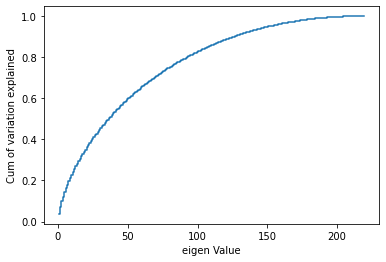

In [49]:
plt.step(list(range(1,220)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

- Hence, 150 seems a reasonable number as it provides details for more than 90% of the data.

In [50]:
pca_150 = PCA(n_components=150)
pca_150.fit(X_train_Scaled)
print(pca_150.components_)
print(pca_150.explained_variance_ratio_)
X_train_pca_150 = pca_150.transform(X_train_Scaled)
X_test_pca_150 = pca_150.transform(X_test_Scaled)

[[ 0.03938479 -0.00962393 -0.00831935 ...  0.04095677 -0.02262124
  -0.02406935]
 [-0.03202975  0.00375315 -0.0026834  ... -0.03325954  0.01490864
   0.04304356]
 [-0.0142449   0.01896111  0.01300556 ...  0.02364228 -0.0181542
   0.00191123]
 ...
 [-0.04338855 -0.03769048 -0.12696734 ...  0.00747138 -0.01306392
   0.02485897]
 [-0.11371288 -0.05893558  0.03160337 ...  0.03596548  0.01682052
   0.11448289]
 [ 0.00503752  0.0012111  -0.06212179 ... -0.02756968 -0.00319345
   0.04359276]]
[0.0370038  0.03450443 0.02603429 0.02377904 0.02068867 0.01882757
 0.01749734 0.01705101 0.01633056 0.01515553 0.01477653 0.0138589
 0.01349541 0.01308603 0.0123518  0.01202757 0.01153699 0.01118827
 0.01095144 0.01064651 0.0104699  0.01014938 0.01002054 0.00986464
 0.00963785 0.00936522 0.00920846 0.0089866  0.00892498 0.0087549
 0.00863545 0.00837104 0.00829717 0.00821941 0.00806974 0.00797659
 0.00785637 0.00782897 0.00759071 0.00756261 0.00733198 0.00723833
 0.00703627 0.00699853 0.00690608 0.006811

In [51]:
n_neighbors = list(range(1, 21))
weights = ['uniform','distance']
# ,'chebyshev','seuclidean','minkowski'
metric = ['euclidean','manhattan','chebyshev','minkowski']
param_grid = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
}

# defining parameter range
grid_knn = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=0)

# fitting the model for grid search
grid_search_knn=grid_knn.fit(X_train_pca_150, y_train.values.ravel())

In [52]:
accuracy_knn_train = grid_search_knn.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy_knn_train))

knn = KNeighborsClassifier(**grid_search_knn.best_params_)
knn.fit(X_train_pca_150, y_train.values.ravel())

y_test_predicted_knn=knn.predict(X_test_pca_150) 

test_accuracy_knn=accuracy_score(y_test,y_test_predicted_knn)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy_knn) )

Accuracy for our training dataset is : 92.82%
Accuracy for our testing dataset is : 95.54%


- Hence, by performing (1) Scaling, (2) Dimensionality Reduction using PCA, (3) GridSearch K- Cross Validation, we were able to bring the accuracy score of our testing data to 95.54%

## E. Display and explain the classification report in detail

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predicted_knn))

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       301
           1       0.00      0.00      0.00        13

    accuracy                           0.96       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.92      0.96      0.94       314



### Observations
1. The model provided precision score of 96% for Passed student and 100% recall. Hence, 98% of correct positive predictions relative to total positive predictions were correctly predicted. The F1-score, which is the harmonic mean of precision and recall is 98%, which indicates model did a good job.
2. Out of 314 test data points, 301 were passed data, and 13 were failed. Weighted average for precision recall and f1-score are 92%, 96% and 94%. This indicated the model has done a good job.
3. However, model wasn't able to predict most fail values, hence, it didn't do a good job to predict fail target feature value.

## F. Apply the above steps for all possible models that you have learnt so far

Note:
1. Since the dataset is based on classification, we will only create Supervised Machine Learning models
2. PCA and Scaling will be same for all the models, hence, this is already done ahead of other steps

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_pca_150,y_train.values.ravel())
y_pred = logreg.predict(X_test_pca_150)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9171974522292994


In [55]:
import warnings
warnings.filterwarnings('ignore')

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
grid_log = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=3)                     # number of folds
grid_search_log = grid_log.fit(X_train_pca_150,y_train.values.ravel())
print(grid_search_log.best_params_)

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [56]:
accuracy_log = grid_search_log.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy_log))

lr = LogisticRegression(**grid_search_log.best_params_)
lr.fit(X_train_pca_150, y_train.values.ravel())

y_test_predicted_log=lr.predict(X_test_pca_150) 

test_accuracy_log=accuracy_score(y_test,y_test_predicted_log)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy_log) )

print("\nClassification Report Shown Below:\n")
print(classification_report(y_test, y_test_predicted_log))

Accuracy for our training dataset is : 92.74%
Accuracy for our testing dataset is : 95.86%

Classification Report Shown Below:

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       301
           1       0.00      0.00      0.00        13

    accuracy                           0.96       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.92      0.96      0.94       314



### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)

# parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples, cv=3) #default cv = 3

random_search_rfc = randomCV.fit(X_train_pca_150, y_train.values.ravel())
print(random_search_rfc.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 6, 'min_samples_split': 9}


In [58]:
accuracy_rfc = random_search_rfc.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy_rfc))

rfc = RandomForestClassifier(**random_search_rfc.best_params_)
rfc.fit(X_train_pca_150, y_train.values.ravel())

y_test_predicted_rfc=rfc.predict(X_test_pca_150) 

test_accuracy_rfc=accuracy_score(y_test,y_test_predicted_rfc)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy_rfc) )

print("\nClassification Report Shown Below:\n")
print(classification_report(y_test, y_test_predicted_rfc))

Accuracy for our training dataset is : 92.74%
Accuracy for our testing dataset is : 95.86%

Classification Report Shown Below:

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       301
           1       0.00      0.00      0.00        13

    accuracy                           0.96       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.92      0.96      0.94       314



In [77]:
param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5],
    'criterion' :['gini', 'entropy']
}
rfc_grid_clf=RandomForestClassifier(random_state=42)
grid_CV_rfc = GridSearchCV(estimator=rfc_grid_clf, param_grid=param_grid, cv= 5)
grid_CV_rfc_search = grid_CV_rfc.fit(X_train_pca_150, y_train.values.ravel())
print(grid_CV_rfc_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


In [79]:
accuracy_rfc_grid = grid_CV_rfc_search.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy_rfc_grid))

rfc_grid = RandomForestClassifier(**grid_CV_rfc_search.best_params_)
rfc_grid.fit(X_train_pca_150, y_train.values.ravel())

y_test_predicted_rfc_grid=rfc_grid.predict(X_test_pca_150) 

test_accuracy_rfc_grid=accuracy_score(y_test,y_test_predicted_rfc_grid)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy_rfc_grid) )

print("\nClassification Report Shown Below:\n")
print(classification_report(y_test, y_test_predicted_rfc_grid))

Accuracy for our training dataset is : 92.74%
Accuracy for our testing dataset is : 95.86%

Classification Report Shown Below:

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       301
           1       0.00      0.00      0.00        13

    accuracy                           0.96       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.92      0.96      0.94       314



### Support Vector Classifier

In [59]:
from sklearn.svm import SVC
model = SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(model, param_grid, refit = True, verbose = 0)
  
# fitting the model for grid search
grid_search_svc = grid.fit(X_train_pca_150, y_train.values.ravel())
print(grid_search_svc.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [60]:
accuracy_svc = grid_search_svc.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy_svc))

svc_model = SVC(**grid_search_svc.best_params_)
svc_model.fit(X_train_pca_150, y_train.values.ravel())

y_test_predicted_svc=svc_model.predict(X_test_pca_150) 

test_accuracy_svc=accuracy_score(y_test,y_test_predicted_svc)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy_svc) )

print("\nClassification Report Shown Below:\n")
print(classification_report(y_test, y_test_predicted_svc))

Accuracy for our training dataset is : 92.74%
Accuracy for our testing dataset is : 95.86%

Classification Report Shown Below:

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       301
           1       0.00      0.00      0.00        13

    accuracy                           0.96       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.92      0.96      0.94       314



### XGBoost Classifier

In [61]:
from xgboost import XGBClassifier

# Define the search space
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

- XGB requires target class column to have values as 0,1,2. But our target class has value -1,1. Hence, using label encoder to train xgb.

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [63]:
# Define grid search

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           n_jobs=-1, refit='recall',
                           cv=kfold,
                           verbose=0)
# Fit grid search
grid_result_xgb = grid_search_xgb.fit(X_train_pca_150, y_train_le)
# Print grid search summary
print(grid_result_xgb.best_params_)

{'colsample_bytree': 0.3, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [64]:
accuracy_xgb = grid_result_xgb.best_score_ *100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy_xgb))

xgb_model = XGBClassifier(**grid_result_xgb.best_params_)
xgb_model.fit(X_train_pca_150, y_train_le)

y_test_predicted_xgb=xgb_model.predict(X_test_pca_150) 

test_accuracy_xgb=accuracy_score(y_test_le,y_test_predicted_xgb)*100

print("Accuracy for our testing dataset is : {:.2f}%".format(test_accuracy_xgb) )

print("\nClassification Report Shown Below:\n")
print(classification_report(y_test_le, y_test_predicted_xgb))

Accuracy for our training dataset is : 68.75%
Accuracy for our testing dataset is : 95.22%

Classification Report Shown Below:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       301
           1       0.00      0.00      0.00        13

    accuracy                           0.95       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.92      0.95      0.94       314



# Q6.Post Training and Conclusion

## A. Display and compare all the models designed with their train and test accuracies

In [80]:
training_accuracies=[accuracy_knn_train, accuracy_log, accuracy_rfc, accuracy_rfc_grid, accuracy_svc, accuracy_xgb]
testing_accuracies=[test_accuracy_knn, test_accuracy_log, test_accuracy_rfc, test_accuracy_rfc_grid, test_accuracy_svc, test_accuracy_xgb]

data = {'Training Accuracy' : training_accuracies, 'Testing Accuracy': testing_accuracies}
index =['KNN ', 'Logistic Regression','Random Forest RandomSearchCV', 'Random Forest GridSearchCV', 'Support Vector Classifier','XGBoost']
pd.DataFrame(data, index=index)

,Training Accuracy,Testing Accuracy
KNN,92.817107,95.541401
Logistic Regression,92.737485,95.859873
Random Forest RandomSearchCV,92.737485,95.859873
Random Forest GridSearchCV,92.737530,95.859873
Support Vector Classifier,92.737530,95.859873
XGBoost,68.748535,95.222930


## B. Select the final best trained model along with your detailed comments for selecting this model

As observed from the above dataframe for training and testing accuracies, we find that all the models produced Fairly similarly good on the testing data with 95%+ testing accuracy. For training, XGBoost performed way worse with ~68%, however, the remaining models produced accuracies of ~92% on training data. The top 2 performing models on both training and test data are "Random Forest" & "Support Vector Classifier". The testing accuracy for both of these is same with the currrent optimisation, the training accuracy for SVC is slightly better than Random Forest. Regardless, on increasing depth of random forest and n_estimators, we can improve it's accuracy, but due to heavy GPU computation, I couldn't perform it on the current system. Hence, choosing Random Forest Model RandomisedSearch as the best trained model

## C. Pickle the selected model for future use

In [81]:
import pickle
pickle.dump(rfc_grid, open('model_random_forest.pkl', 'wb'))

## D. Write your conclusion on the results
Detailed suggestions on the data points collected by the bank to do better Analysis in the future
1. The results of the model indicated that they did a good job in predicting passed status. However, none of them did a good job in predicted failed values.
2. There was high imbalance the data, and hence, upsampling was required to perform on the data
3. Suggestion would be to provide metadata on the features present in the dataset. The current columns were just a bunch of numerical numbers, which didn't meant anything to the human eye. Hence, understanding what is the function of each column, will help the data scientist to logically infer which columns can be proved more useful than the other.
4. The data had multiple null values, and 450+ columns with no meaning. The data wasn't well prepared to provide to a data scientist, and hence, required a lot of 

# THE End